In [ ]:
!nvidia-smi

Tue Oct 29 16:47:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install pandas==2.2.2 scipy==1.13.1 scikit-learn==1.5.2 supervision==0.24.0 ultralytics==8.3.7 roboflow==1.1.47 opencv-python==4.10.0.84

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pwd

/content


In [ ]:
from google.colab import userdata
import roboflow

# Retrieve the Roboflow API key from Colab's secret management
roboflow_key = userdata.get('roboflow_key')  # Replace 'roboflow_key' with your actual secret name

# Check if the key is retrieved successfully
if roboflow_key is None:
    raise RuntimeError("API Key not found. Please check your Colab Secrets.")

# Initialize Roboflow
rf = roboflow.Roboflow(api_key=roboflow_key)

# Access the workspace and project
project = rf.workspace("mihailo").project("football-players-detection-3zvbc-7ocfe")

# Access the specific version of the dataset
version = project.version(2)

# Download the dataset in YOLOv11 format
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-2 in yolov11:: 100%|██████████| 1948/1948 [00:01<00:00, 1245.17it/s]


In [ ]:
!pwd


/content


In [ ]:
!ls


football-players-detection-2  sample_data


In [ ]:
!ls football-players-detection-2

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


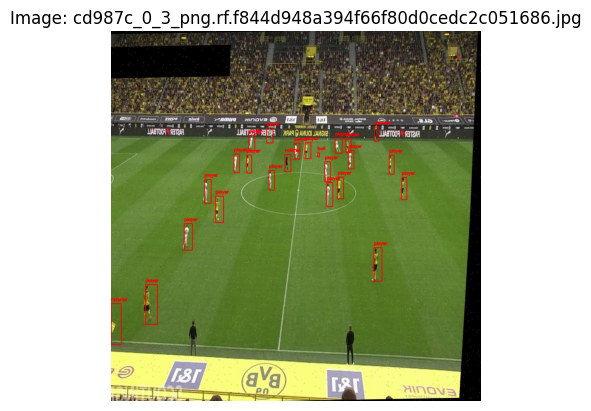

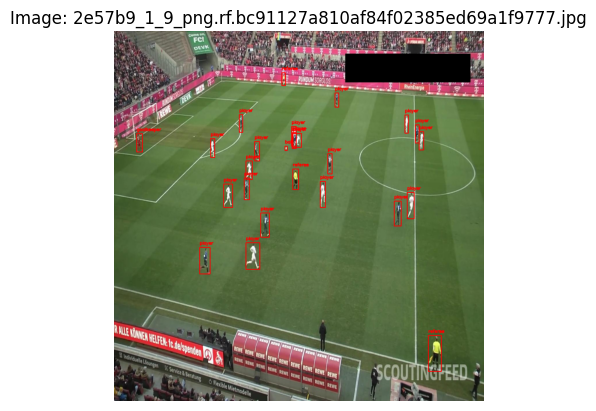

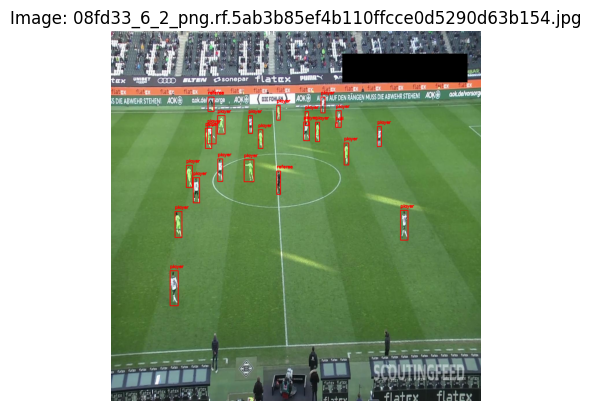

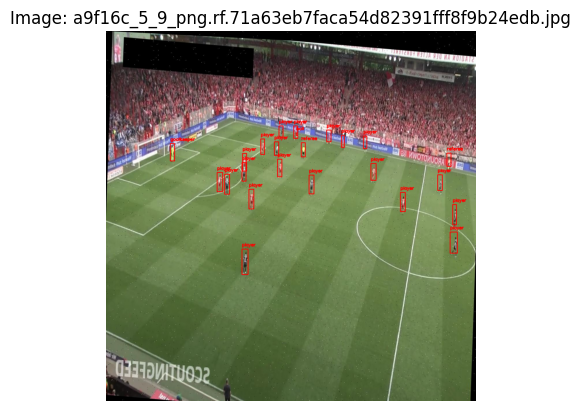

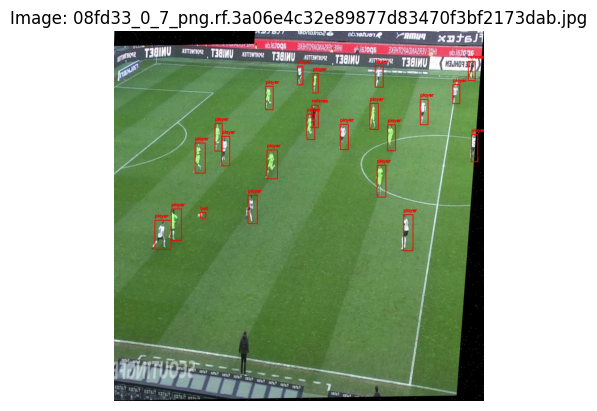

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to convert YOLO format to bounding box coordinates
def yolo_to_bbox(image_width, image_height, x_center, y_center, width, height):
    # Convert YOLO center coordinates and dimensions to pixel values
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height

    # Calculate the top-left and bottom-right coordinates
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    return x1, y1, x2, y2

# Path to the images and labels
image_dir = 'football-players-detection-2/train/images/'
label_dir = 'football-players-detection-2/train/labels/'

# List of image files
image_files = os.listdir(image_dir)

# Load class names from the data.yaml file (make sure to have already loaded this)
# Assuming class_names has been defined earlier from data.yaml
class_names = ['ball', 'goalkeeper', 'player', 'referee']  # Example, modify according to your class names

# Display a few images with their annotations and class names
for img_file in image_files[:5]:  # Display first 5 images
    img_path = os.path.join(image_dir, img_file)
    img = cv2.imread(img_path)
    img_height, img_width, _ = img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    # Load and display the corresponding label
    label_file = img_file.replace('.jpg', '.txt')  # Assuming labels are in .txt format
    label_path = os.path.join(label_dir, label_file)

    # Read the label file
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # Convert YOLO format to bounding box coordinates
            x1, y1, x2, y2 = yolo_to_bbox(img_width, img_height, x_center, y_center, width, height)

            # Draw the bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

            # Annotate with class name
            class_name = class_names[class_id]
            cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image: {img_file}')
    plt.show()


In [ ]:
# Set the YAML_PATH to the location of your data.yaml file
YAML_PATH = '/content/datasets/data.yaml'

In [ ]:
# Move the dataset to the expected location
!mv football-players-detection-2 /content/datasets/

In [ ]:
!ls -l /content/datasets


total 24
-rw-r--r-- 1 root root  332 Oct 29 16:48 data.yaml
-rw-r--r-- 1 root root  176 Oct 29 16:48 README.dataset.txt
-rw-r--r-- 1 root root 1345 Oct 29 16:48 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Oct 29 16:48 test
drwxr-xr-x 4 root root 4096 Oct 29 16:48 train
drwxr-xr-x 4 root root 4096 Oct 29 16:48 valid


In [ ]:
import os

# List files and directories in '/content/datasets'
dataset_dir = '/content/datasets/'
print("Contents of /content/datasets/:")
print(os.listdir(dataset_dir))


Contents of /content/datasets/:
['README.dataset.txt', 'data.yaml', 'valid', 'README.roboflow.txt', 'train', 'test']


In [ ]:
# Training command for YOLO
!yolo mode=train model=yolo11s.pt task=detect data={YAML_PATH} epochs=200 patience=20 imgsz=1280 batch=8 plots=True cache=False